#Weather Data Analysis

You are given a dataset containing daily weather information for a city over the
last year. The dataset contains columns such as Date, Temperature, Humidity,
Wind Speed, and Weather Condition (Sunny, Rainy, Cloudy, etc.)

1. Data Generation Task: Using Pandas and NumPy, generate a dummy
dataset with 365 rows (representing days of the year). The Temperature
column should contain random values between 10°C and 40°C, Humidity
values between 30% and 90%, and Wind Speed between 0 and 20 km/h.
The Weather Condition should randomly be assigned one of the three
values: ’Sunny’, ’Rainy’, or ’Cloudy

In [12]:
import numpy as np
import pandas as pd

days=365
date_range=pd.date_range(start='2023-01-01',periods=days)
np.random.seed()

temperature=np.random.uniform(10,40,days).round(1)
humidity=np.random.uniform(0.3,0.9,days).round()
wind_speed=np.random.uniform(0,20,days).round(1)
weather_condition=np.random.choice(['Sunny','Rainy','Cloudy'])

weather_data=pd.DataFrame({
     'Date':date_range,
     'Temperature':temperature,
     'Humidity':humidity,
     'Wind Speed':wind_speed,
     'Weather Condition':weather_condition
})
print(weather_data)

          Date  Temperature  Humidity  Wind Speed Weather Condition
0   2023-01-01         21.3       1.0         6.8            Cloudy
1   2023-01-02         19.3       1.0         3.7            Cloudy
2   2023-01-03         14.8       0.0         3.3            Cloudy
3   2023-01-04         39.2       0.0        19.1            Cloudy
4   2023-01-05         35.5       1.0        16.5            Cloudy
..         ...          ...       ...         ...               ...
360 2023-12-27         17.6       0.0        17.7            Cloudy
361 2023-12-28         28.6       0.0        12.7            Cloudy
362 2023-12-29         33.2       1.0        12.3            Cloudy
363 2023-12-30         24.4       1.0         3.0            Cloudy
364 2023-12-31         33.4       1.0        11.0            Cloudy

[365 rows x 5 columns]


2. NumPy Task: Convert the Temperature column into a NumPy array.
Calculate the mean, median, and standard deviation of the temperature
values.

In [18]:
temp_array=weather_data['Temperature'].to_numpy()


temp_mean=np.mean(temp_array)
temp_median=np.median(temp_array)
temp_std=np.std(temp_array)

print('Mean Temperature:',temp_mean)
print('Median Temperature:',temp_median)
print('Standard Deviation of Temperature:',temp_std)

Mean Temperature: 24.798356164383556
Median Temperature: 25.0
Standard Deviation of Temperature: 8.503507578253865


3. Pandas Task: Filter the data to find all the days when the temperature
was above 30°C and it was Sunny. How many such days are there?

In [24]:
import pandas as pd
# import numpy as np

# days=365
# date_range=pd.date_range(start='2023-01-01',periods=days)
# np.random.seed()

# temperature=np.random.uniform(10,40,days).round(1)
# humidity=np.random.uniform(0.3,0.9,days).round()
# wind_speed=np.random.uniform(0,20,days).round(1)
# weather_condition=np.random.choice(['Sunny','Rainy','Cloudy'])

# weather_data=pd.DataFrame({
#      'Date':date_range,
#      'Temperature':temperature,
#      'Humidity':humidity,
#      'Wind Speed':wind_speed,
#      'Weather Condition':weather_condition
# })
sunny_days=weather_data.loc[(weather_data['Temperature']>=30) & (weather_data['Weather Condition']=='Sunny')]
print(sunny_days)

Empty DataFrame
Columns: [Date, Temperature, Humidity, Wind Speed, Weather Condition]
Index: []


4. Pandas Task: Group the dataset by Weather Condition and calculate
the average Humidity for each weather condition.

In [25]:
avg_humidity=weather_data.groupby('Weather Condition')['Humidity'].mean()
print(avg_humidity)

Weather Condition
Cloudy    0.627397
Name: Humidity, dtype: float64


5. Matplotlib Task: Plot a line graph showing the temperature variation
over the year.


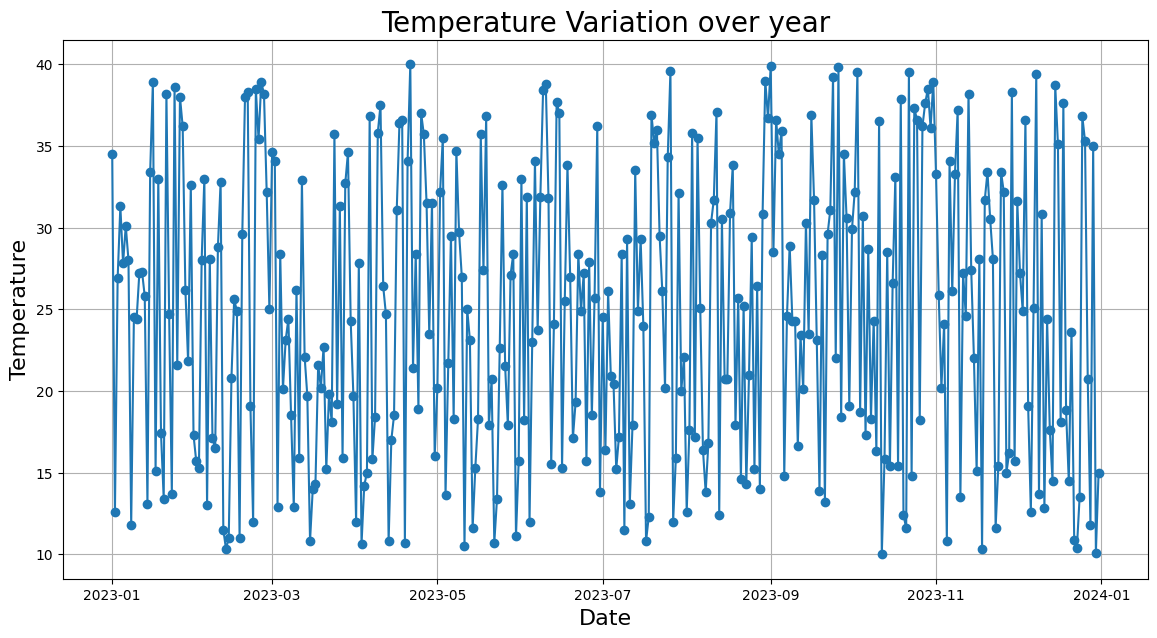

In [29]:
import matplotlib.pyplot as plt

weather_data['Date']=date_range

plt.figure(figsize=(14,7))
plt.plot(weather_data['Date'],weather_data['Temperature'],marker='o',linestyle='-')
plt.title('Temperature Variation over year',fontsize=20)
plt.xlabel('Date' , fontsize=16)
plt.ylabel('Temperature' ,fontsize=16)
plt.grid(True)
plt.show()

6. Matplotlib Task: Create a bar plot that shows the number of days for
each weather condition (Sunny, Rainy, Cloudy, etc.).

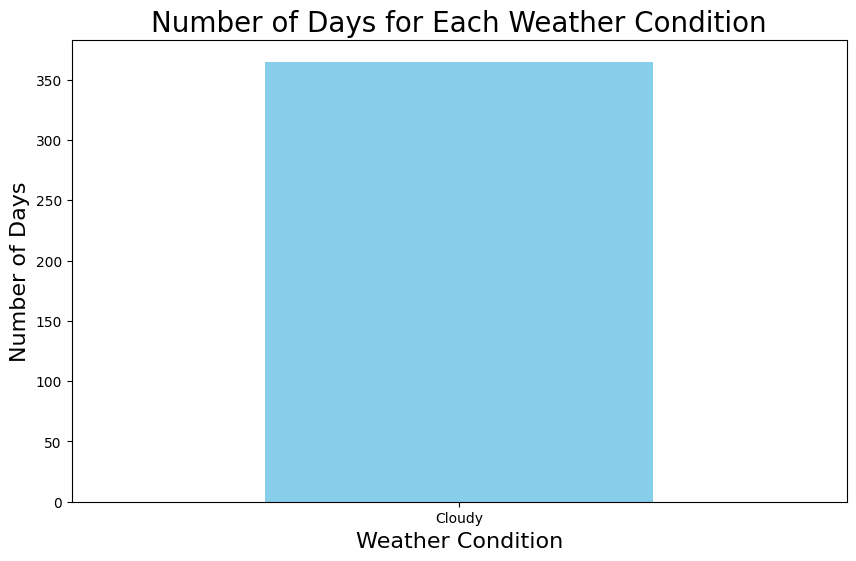

In [30]:
import matplotlib.pyplot as plt
weather_counts=weather_data['Weather Condition'].value_counts()

plt.figure(figsize=(10,6))
weather_counts.plot(kind='bar',color='skyblue')
plt.title('Number of Days for Each Weather Condition',fontsize=20)
plt.xlabel('Weather Condition',fontsize=16)
plt.ylabel('Number of Days',fontsize=16)
plt.xticks(rotation=0)
plt.show()

#  Sales Data Analysis

You are analyzing a dataset for an online store that includes information such
as Order ID, Product, Price, Quantity, and Date of Purchase.

1. Data Generation Task: Generate a dummy dataset with 500 rows. Use
random Product names (choose from 10 different products), random Pricevalues between $10 and $1000, and Quantity values between 1 and 20.
Assign random dates for Date of Purchase within the past year.

In [33]:
import numpy as np
import pandas as pd
from random import choice,randint
from datetime import datetime,timedelta

np.random.seed(5)
rows=1000
product_names=[f"Product {i+1}" for i in range(10)]

data={
    'Order ID':np.arange(1,rows+1),
    'Product':np.random.choice(product_names,rows),
    'Price':np.random.uniform(10,1000,rows).round(2),
    'Quantity':np.random.randint(1,20,rows),
    'Date of Purchase': [(datetime.now() - timedelta(days=np.random.randint(0, 365))).date() for _ in range(rows)]  # Random dates in the past year
}

dummy_data=pd.DataFrame(data)
dummy_data.to_csv('dummy_dataset.csv', index=False)
print(dummy_data)

     Order ID     Product   Price  Quantity Date of Purchase
0           1   Product 4  387.43        18       2023-11-28
1           2   Product 7  738.11         5       2024-07-16
2           3   Product 7  432.05        12       2024-02-27
3           4   Product 1   89.29        14       2024-07-26
4           5  Product 10   70.92        12       2024-07-02
..        ...         ...     ...       ...              ...
995       996   Product 6  468.33         3       2024-02-12
996       997   Product 1  599.01         2       2024-07-21
997       998  Product 10  762.03         5       2023-12-30
998       999   Product 3  284.76        10       2024-07-17
999      1000  Product 10  975.46        14       2024-09-07

[1000 rows x 5 columns]


2. NumPy Task: Create a NumPy array containing the Price and Quantity
columns. Compute the total sales for each order (Price * Quantity) using
NumPy

In [35]:
priceArray=dummy_data['Price'].to_numpy()
quantityArray=dummy_data['Quantity'].to_numpy()

total_sales=priceArray*quantityArray
dummy_data['Total Sales']=total_sales
print(dummy_data)


     Order ID     Product   Price  Quantity Date of Purchase  Total Sales
0           1   Product 4  387.43        18       2023-11-28      6973.74
1           2   Product 7  738.11         5       2024-07-16      3690.55
2           3   Product 7  432.05        12       2024-02-27      5184.60
3           4   Product 1   89.29        14       2024-07-26      1250.06
4           5  Product 10   70.92        12       2024-07-02       851.04
..        ...         ...     ...       ...              ...          ...
995       996   Product 6  468.33         3       2024-02-12      1404.99
996       997   Product 1  599.01         2       2024-07-21      1198.02
997       998  Product 10  762.03         5       2023-12-30      3810.15
998       999   Product 3  284.76        10       2024-07-17      2847.60
999      1000  Product 10  975.46        14       2024-09-07     13656.44

[1000 rows x 6 columns]


3. Pandas Task: Filter the data to show only orders where the total sales
value is greater than $100.

In [37]:
import pandas as pd
filtered=dummy_data[dummy_data['Total Sales']<100]
print(filtered)

     Order ID     Product  Price  Quantity Date of Purchase  Total Sales
104       105   Product 7  14.40         6       2024-08-20        86.40
142       143   Product 8  15.01         3       2024-06-26        45.03
149       150   Product 2  17.91         3       2024-08-08        53.73
241       242   Product 6  32.66         2       2023-11-03        65.32
339       340   Product 8  67.62         1       2024-01-24        67.62
349       350   Product 3  32.88         1       2024-01-15        32.88
565       566  Product 10  90.18         1       2024-08-30        90.18
696       697  Product 10  33.58         2       2024-01-12        67.16
734       735   Product 6  10.94         3       2024-08-17        32.82
952       953   Product 4  82.65         1       2023-12-18        82.65


4. Pandas Task: Group the data by Product and calculate the total quantity sold for each product.

In [39]:
import pandas as pd
total_quantity=dummy_data.groupby('Product')['Quantity'].sum()
print(total_quantity)

Product
Product 1     1047
Product 10     930
Product 2     1162
Product 3      867
Product 4     1018
Product 5      935
Product 6      893
Product 7      969
Product 8      880
Product 9      835
Name: Quantity, dtype: int64


5. Matplotlib Task: Create a scatter plot to visualize the relationship
between Price and Quantity of products sold

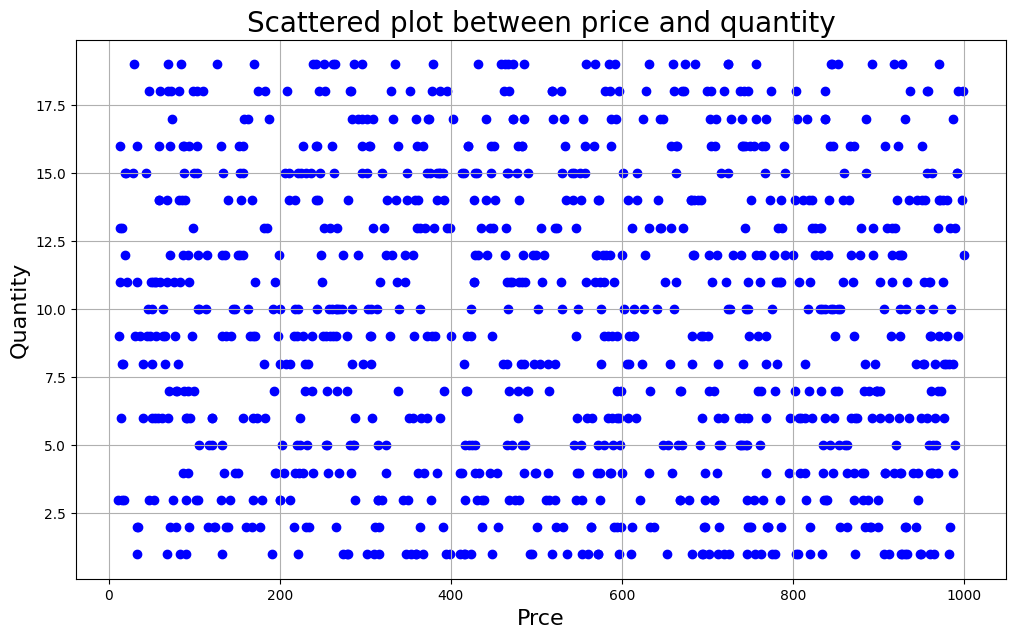

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.scatter(dummy_data['Price'],dummy_data['Quantity'],color='blue',marker='o')
plt.title('Scattered plot between price and quantity' , fontsize=20)
plt.xlabel('Prce' , fontsize=16)
plt.ylabel('Quantity',fontsize=16)
plt.grid(True)
plt.show()

6. Matplotlib Task: Create a histogram to show the distribution of total
sales values.

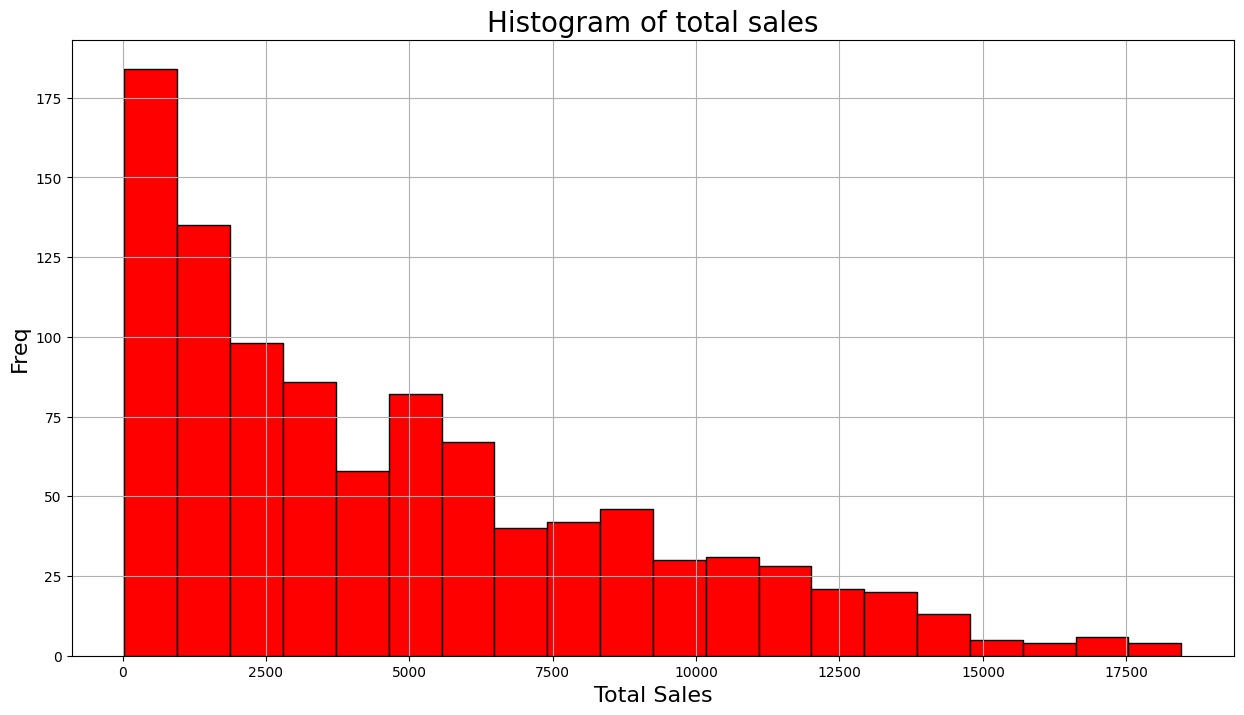

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.hist(dummy_data['Total Sales'], bins=20,color='red',edgecolor='black')
plt.title('Histogram of total sales',fontsize=20)
plt.xlabel('Total Sales',fontsize=16)
plt.ylabel('Freq',fontsize=16)
plt.grid(True)
plt.show()



```
# This is formatted as code
```

# Employee Salary Analysis

You have a dataset that contains information about employees in a company,
including columns such as Employee ID, Name, Department, Salary, and Years
of Experience

1. Data Generation Task: Generate a dataset with 300 rows. For Employee ID, use sequential integers, for Name, use random names from a list
of 20 names. Assign Department randomly from 5 different departments.
Generate random Salary values between $30,000 and $120,000 and Years
of Experience between 1 and 25.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


rows=300
departments=["SALES","IT","HUMAN RESOUCE", "FINANCE" , "MARKETING"]
names=[
    "Ifra","Isha","Khadija","Zainab","Mehak","naveera",
    "Alishba","Afefa","Iraj","Mahrukh","maryam","fiza",
    "hanan","damian","johncena","justin","Zeeshan"
]
np.random.seed(5)

dataset={
    'Employee ID':np.arange(1,rows+1),
    'Name':np.random.choice(names,rows),
    'Department':np.random.choice(departments,rows),
    'Salary' :np.random.uniform(30000,120000,rows).round(2),
    'Years of Experience':np.random.randint(1,25,rows)
 }

data =pd.DataFrame(dataset)
data.to_csv('employee_data.csv',index=False)
print(data)

     Employee ID      Name     Department     Salary  Years of Experience
0              1    Zainab  HUMAN RESOUCE   64923.44                    4
1              2  johncena      MARKETING  104648.51                    2
2              3    justin  HUMAN RESOUCE   54678.20                    5
3              4   Alishba  HUMAN RESOUCE  106740.18                   19
4              5   Zeeshan  HUMAN RESOUCE  119488.00                   17
..           ...       ...            ...        ...                  ...
295          296     Afefa          SALES   89810.53                    2
296          297      fiza        FINANCE   33653.32                   10
297          298      Isha      MARKETING   30481.04                   24
298          299      Iraj        FINANCE  114877.16                   12
299          300    justin      MARKETING   55960.90                   14

[300 rows x 5 columns]


2. NumPy Task: Create a NumPy array with the Salary column. Calculate
the average, maximum, and minimum salary.


In [49]:
import numpy as np

salaryArray=data['Salary'].to_numpy()
avg_salary=np.mean(salaryArray)
max_salary=np.max(salaryArray)
min_salary=np.min(salaryArray)

print('Average Salary:',avg_salary)
print('Maximum Salary:',max_salary)
print('Minimum Salary:',min_salary)

Average Salary: 73850.54720000002
Maximum Salary: 119488.0
Minimum Salary: 30274.57


3. Pandas Task: Filter the employees who have more than 5 years of experience and earn a salary above the average.

In [51]:
import pandas as pd

filtered=data[(data['Years of Experience']<5) & (data['Salary']>avg_salary)]
print(filtered)

     Employee ID      Name     Department     Salary  Years of Experience
1              2  johncena      MARKETING  104648.51                    2
6              7      Iraj      MARKETING   96232.84                    2
18            19      fiza          SALES   89147.84                    4
32            33     Mehak  HUMAN RESOUCE   99799.69                    1
72            73     Afefa        FINANCE  113632.13                    3
80            81   Mahrukh          SALES  107309.86                    2
85            86    Zainab      MARKETING   87901.83                    4
92            93     Mehak        FINANCE  106042.29                    4
121          122      Isha  HUMAN RESOUCE   94376.39                    2
129          130      Ifra      MARKETING   77914.96                    3
145          146   Khadija  HUMAN RESOUCE   78558.70                    3
147          148      Iraj  HUMAN RESOUCE   98828.29                    4
155          156  johncena          SA

4. Pandas Task: Group the dataset by Department and calculate the mean
salary for each department.

In [52]:
import pandas as pd

meanSalary=data.groupby('Department')['Salary'].mean()
print(meanSalary)

Department
FINANCE          72435.880893
HUMAN RESOUCE    75173.004921
IT               72816.208154
MARKETING        75427.714138
SALES            73361.975345
Name: Salary, dtype: float64


5. . Matplotlib Task: Plot a bar chart showing the average salary in each
department.

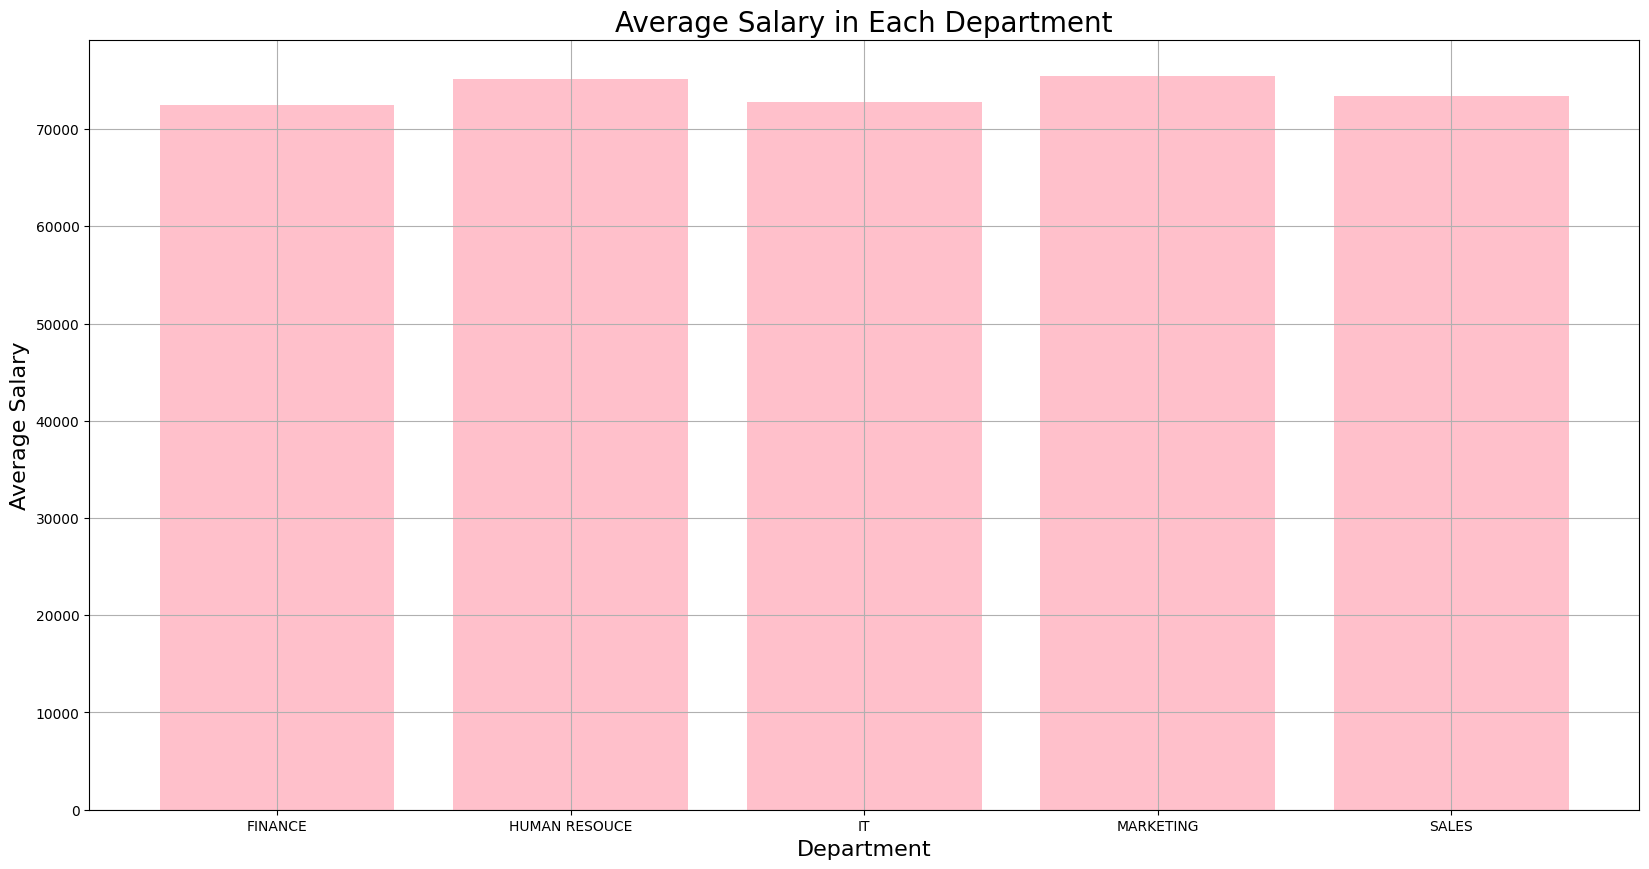

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(meanSalary.index,meanSalary.values,color='pink')
plt.title('Average Salary in Each Department',fontsize=20)
plt.xlabel('Department',fontsize=16)
plt.ylabel('Average Salary',fontsize=16)
plt.grid(True)
plt.show()

6. Matplotlib Task: Create a line plot showing the salary distribution for
employees with increasing years of experience.


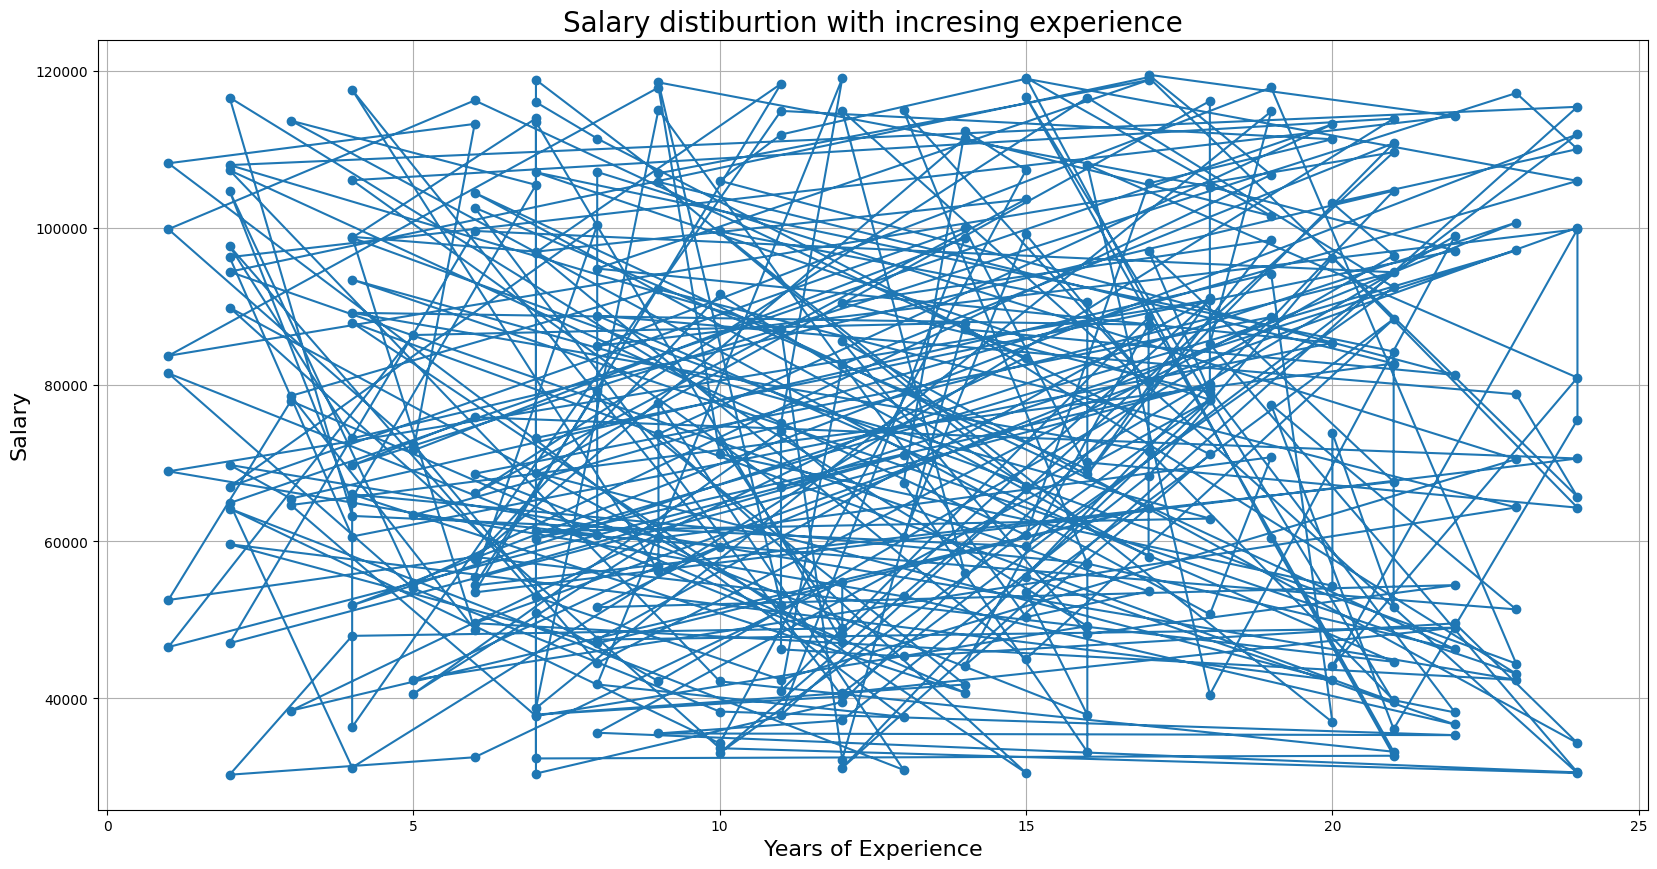

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(data['Years of Experience'],data['Salary'], marker='o',linestyle='-')
plt.title('Salary distiburtion with incresing experience',fontsize=20)
plt.xlabel('Years of Experience',fontsize=16)
plt.ylabel('Salary',fontsize=16)
plt.grid(True)
plt.show()



```
`# This is formatted as code`
```

# Exam Score Analysis

You are analyzing the performance of students in an exam. The dataset contains
Student ID, Name, Subject, Score, and Total Marks.

1. Data Generation Task: Generate a dummy dataset with 200 rows. Use
random Student ID, Name, Subject (choose from 5 subjects), and assign
random Score values between 0 and 100, with Total Marks fixed at 100
for all subjects.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import choice,randint

np.random.seed(4)
subject=[
    "enlish","urdu","pf","islamiyat","oop"
]
name=[
    "Ifra", "Isha", "Khadija", "Zainab", "Mehak", "Naveera",
    "Alishba", "Afefa", "Iraj", "Mahrukh", "Maryam", "Fiza",
    "Hanan", "Damian", "John Cena", "Justin", "Zeeshan"
]
rows=200
exam_data={
    'Student ID':np.arange(1,rows+1),
    'Name': np.random.choice(name,rows),
    'Subject': np.random.choice(subject,rows),
    'Score':np.random.randint(0,100,rows),
    'Total Marks':100
}

exam_data=pd.DataFrame(exam_data)
exam_data.to_csv('exam_data.csv',index=False)
print(exam_data)




     Student ID       Name    Subject  Score  Total Marks
0             1  John Cena         pf     13          100
1             2    Naveera     enlish     92          100
2             3       Isha  islamiyat      2          100
3             4       Iraj       urdu     77          100
4             5       Iraj       urdu     14          100
..          ...        ...        ...    ...          ...
195         196      Afefa     enlish     26          100
196         197     Justin         pf     53          100
197         198  John Cena  islamiyat      1          100
198         199     Zainab  islamiyat     88          100
199         200      Afefa     enlish     71          100

[200 rows x 5 columns]


2. NumPy Task: Using the Score column, calculate the overall mean, median, and standard deviation of the exam scores.

In [61]:
import numpy as np

overall_mean=exam_data['Score'].mean()
overall_median=exam_data['Score'].median()
overall_std=exam_data['Score'].std()

print('Overall Mean:',overall_mean)
print('Overall Median:',overall_median)
print('Overall Standard Deviation:',overall_std)

Overall Mean: 48.715
Overall Median: 49.0
Overall Standard Deviation: 29.783199456224413


3. Pandas Task: Filter the students who scored above 80% in the exam.
How many students achieved this score?


In [63]:
import pandas as pd

filtered_students=exam_data[exam_data['Score']>80]
filtered_students.to_csv('filtered_students.csv',index=False)
total=filtered_students.count()
print(filtered_students)
print('Total Students:',total)

     Student ID       Name    Subject  Score  Total Marks
1             2    Naveera     enlish     92          100
10           11      Hanan       urdu     87          100
14           15       Ifra     enlish     98          100
16           17    Alishba  islamiyat     93          100
28           29     Damian        oop     96          100
40           41     Damian       urdu     88          100
51           52      Afefa  islamiyat     94          100
53           54      Mehak  islamiyat     92          100
63           64      Afefa         pf     93          100
65           66       Iraj         pf     86          100
72           73       Fiza  islamiyat     94          100
76           77     Maryam     enlish     97          100
83           84       Isha       urdu     81          100
84           85  John Cena  islamiyat     86          100
92           93     Maryam  islamiyat     84          100
93           94      Afefa       urdu     95          100
100         10

4. Pandas Task: Group the data by Subject and calculate the average score
for each subject.


In [64]:
import pandas as pd

avg_score=exam_data.groupby('Subject')['Score'].mean()
print(avg_score)

Subject
enlish       49.130435
islamiyat    54.333333
oop          47.250000
pf           41.848485
urdu         50.133333
Name: Score, dtype: float64


5. Matplotlib Task: Plot a histogram showing the distribution of scores
across all students.

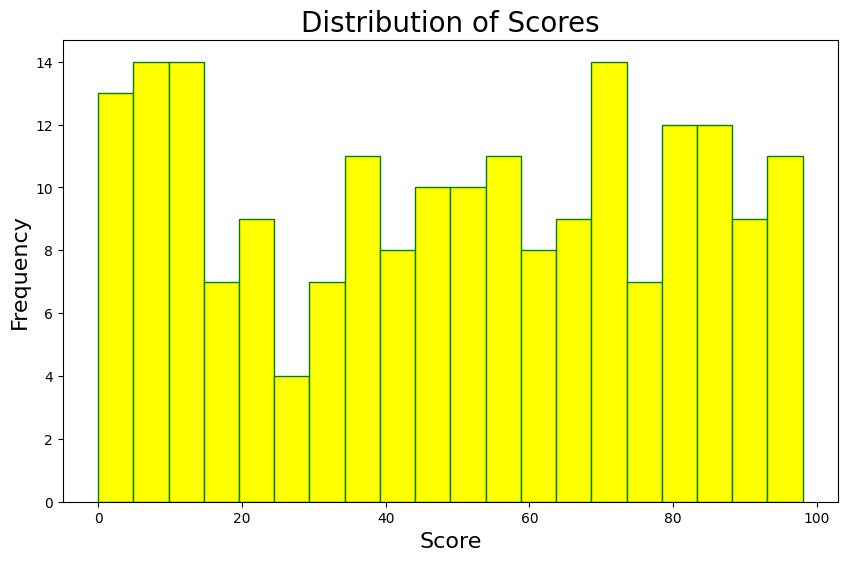

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(exam_data['Score'],bins=20,color='yellow' ,edgecolor='green')
plt.title('Distribution of Scores',fontsize=20)
plt.xlabel('Score',fontsize=16)
plt.ylabel('Frequency',fontsize=16)

plt.show()


6. Matplotlib Task: Create a bar chart to compare the average scores
across different subjects

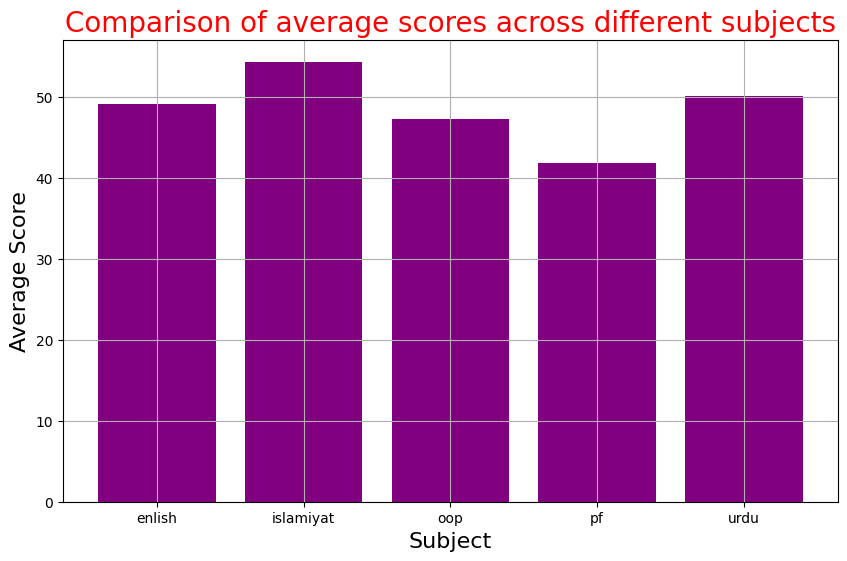

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(avg_score.index,avg_score.values,color='purple')
plt.title('Comparison of average scores across different subjects',fontsize=20,color='red')
plt.xlabel('Subject',fontsize=16)
plt.ylabel('Average Score',fontsize=16)
plt.grid(True)
plt.show()



```
# This is formatted as code
```

# Stock Market Analysis

You are working with stock market data containing columns like Date, Open
Price, Close Price, Volume Traded, and Company

1. Data Generation Task: Generate a dataset with 1000 rows. The Date
column should contain random dates for the past two years, and the Company column should contain random selections from 5 companies. Assign
random Open Price and Close Price values between $50 and $500, and
Volume Traded values between 1000 and 1,000,000.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import choice
from datetime import datetime, timedelta
rows = 1000

companies = ["Netsol", "Devsinc", "LinkedMatrix", "TCS", "Leopard"]
date_today = datetime.now()
start_date = date_today - timedelta(days=365 * 2)

def random_date(start, end):
    return start + timedelta(days=np.random.randint(0, (end - start).days))

stock_data = {
    'Date': [random_date(start_date, date_today) for _ in range(rows)],
    'Company': [choice(companies) for _ in range(rows)],
    'Open Price': np.random.uniform(50, 500, rows).round(2),
    'Close Price': np.random.uniform(50, 500, rows).round(2),
     'Traded Volume': np.random.randint(1000, 1000000, rows)
}

stock_data = pd.DataFrame(stock_data)

stock_data.to_csv('stock_data.csv', index=False)

print(stock_data.head())


                        Date       Company  Open Price  Close Price  \
0 2023-10-20 06:56:41.147973  LinkedMatrix       84.12       374.96   
1 2022-11-14 06:56:41.147973  LinkedMatrix      229.43       355.54   
2 2023-01-17 06:56:41.147973       Devsinc      367.22       348.13   
3 2024-05-11 06:56:41.147973  LinkedMatrix      256.17       162.17   
4 2024-06-28 06:56:41.147973       Devsinc      238.90       487.34   

   Traded Volume  
0         151984  
1         205523  
2          66557  
3         925972  
4         567411  


2. NumPy Task: Convert the Close Price column into a NumPy array.
Calculate the daily percentage change in stock prices

In [75]:
closepriceArray=stock_data['Close Price'].to_numpy()
daily_perectage=np.diff(closepriceArray)/closepriceArray[:-1]*100
print(daily_perectage)

[-5.17921912e+00 -2.08415368e+00 -5.34168270e+01  2.00511809e+02
 -5.49780441e+01  1.26890297e+02  1.96858302e-01 -3.92562149e+01
  4.65262880e+01 -3.55279755e+01  2.95636376e+01  2.77659431e+01
 -7.01257862e+01 -5.24690922e+01  4.02690250e+02 -1.32550782e+01
  2.61606108e+01 -7.97611650e+01  3.13816580e+02 -1.59198684e+01
  1.18592695e+01  9.50780312e+00 -1.09186582e+01  2.77451566e+01
 -9.85357261e-01 -7.31945294e+01  3.03391061e+02  1.00182524e+01
 -3.72020750e+01  2.57823256e+01 -8.08425038e+01  1.74181594e+02
 -5.32158144e+01  4.56554713e+02 -3.94501763e+01 -7.27012931e+01
  4.85121696e+02 -8.41350777e+01  1.47096138e+02  1.64926693e+02
  7.07379573e+00 -6.35588448e+01 -1.94591611e+01  1.53151980e+02
 -1.64758425e+01 -1.50593039e+01  1.86448438e+01 -8.10727378e+01
  6.23598369e+02 -8.47479514e+01  2.74784483e+02 -2.10137189e+01
  5.78783151e+01 -3.40184453e+01  1.23497404e+02 -1.90458109e+01
 -3.48030019e+01  9.49809564e+01 -2.00546946e+00 -7.31339978e+01
 -2.70074196e+01  3.42929

3. Pandas Task: Filter the data to find all the days when the stock price
increased by more than 2% compared to the previous day

In [76]:
import pandas as pd

filtered=stock_data[stock_data['Close Price'].pct_change()>0.02]
print(filtered)

                          Date       Company  Open Price  Close Price  \
4   2024-06-28 06:56:41.147973       Devsinc      238.90       487.34   
6   2024-03-02 06:56:41.147973       Devsinc      155.49       497.82   
9   2022-11-24 06:56:41.147973       Leopard      342.75       443.96   
11  2023-03-20 06:56:41.147973           TCS      419.36       370.85   
12  2023-04-09 06:56:41.147973  LinkedMatrix      329.37       473.82   
..                         ...           ...         ...          ...   
989 2024-06-26 06:56:41.147973       Devsinc      206.97       387.22   
993 2023-08-27 06:56:41.147973       Devsinc       69.92       235.67   
995 2023-07-10 06:56:41.147973       Leopard      377.69       479.28   
997 2022-12-09 06:56:41.147973       Leopard       57.82       302.43   
998 2023-06-09 06:56:41.147973        Netsol      252.19       324.83   

     Traded Volume  
4           567411  
6           654674  
9           765001  
11          381144  
12          154371

4. Pandas Task: Group the data by Company and calculate the total Volume Traded for each company

In [78]:
total_volume_trade=stock_data.groupby('Company')['Traded Volume'].sum()
print(total_volume_trade)

Company
Devsinc          92016665
Leopard         107442794
LinkedMatrix    109124528
Netsol          101957999
TCS             101229922
Name: Traded Volume, dtype: int64


5. Matplotlib Task: Plot a line graph showing the trend of the Close Price
over time for a particular company

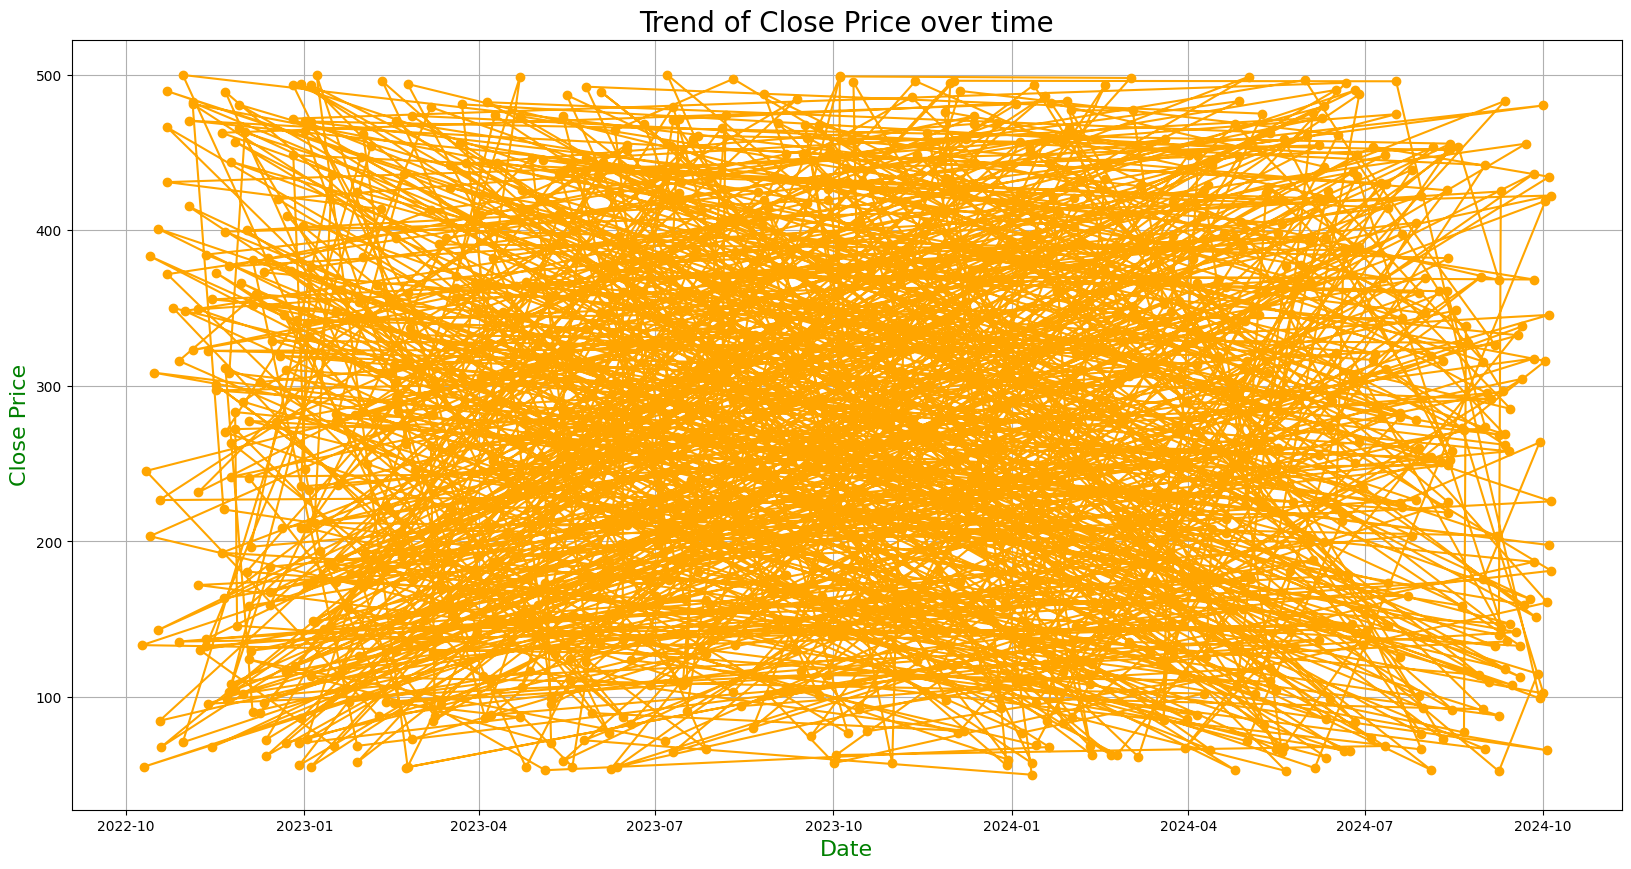

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(stock_data['Date'],stock_data['Close Price'],marker='o',linestyle='-' ,color='orange')
plt.title('Trend of Close Price over time',fontsize=20)
plt.xlabel('Date',fontsize=16 ,color='green')
plt.ylabel('Close Price',fontsize=16 , color='green')
plt.grid(True)
plt.show()

6. Matplotlib Task: Create a bar chart to compare the average percentage
change in Close Price for different companies.

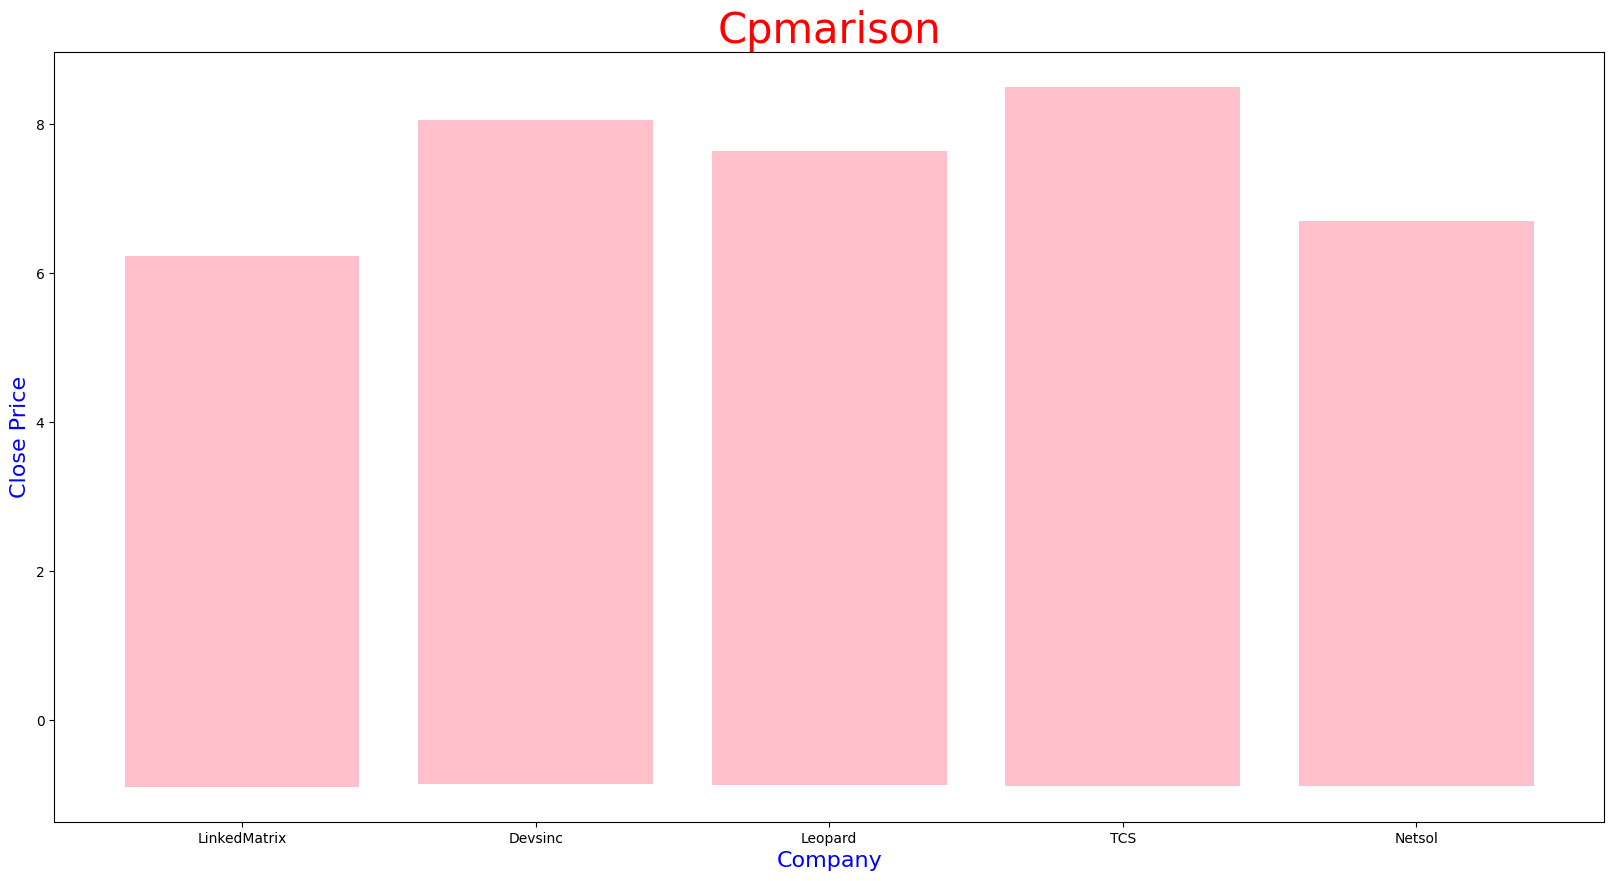

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(stock_data['Company'],stock_data['Close Price'].pct_change(),color='pink')
plt.title('Cpmarison',fontsize=30,color='red')
plt.xlabel('Company',fontsize=16,color='blue')
plt.ylabel('Close Price',fontsize=16,color='blue')
plt.show()
